# Extracción de características y reducción de la dimensionalidad en datos de motor de laminación

*Ignacio Díaz Blanco, 2024, Universidad de Oviedo*

Ejemplo de extracción de características de varios tipos y en varios sensores sobre datos de un motor de laminación de un tren de bandas en caliente:
- lectura de los datos en formato *.mat (matlab)
- representación temporal (plot) de las 4 variables $I_a, V_a, I_f, w$
- extracción de características de varios sensores (6 características en total)
- representación SPLOM (scatter plot matrix) de las características
- reducción de la dimensionalidad con tres técnicas: PCA, tSNE, UMAP
- visualización del espacio latente vs. representación temporal

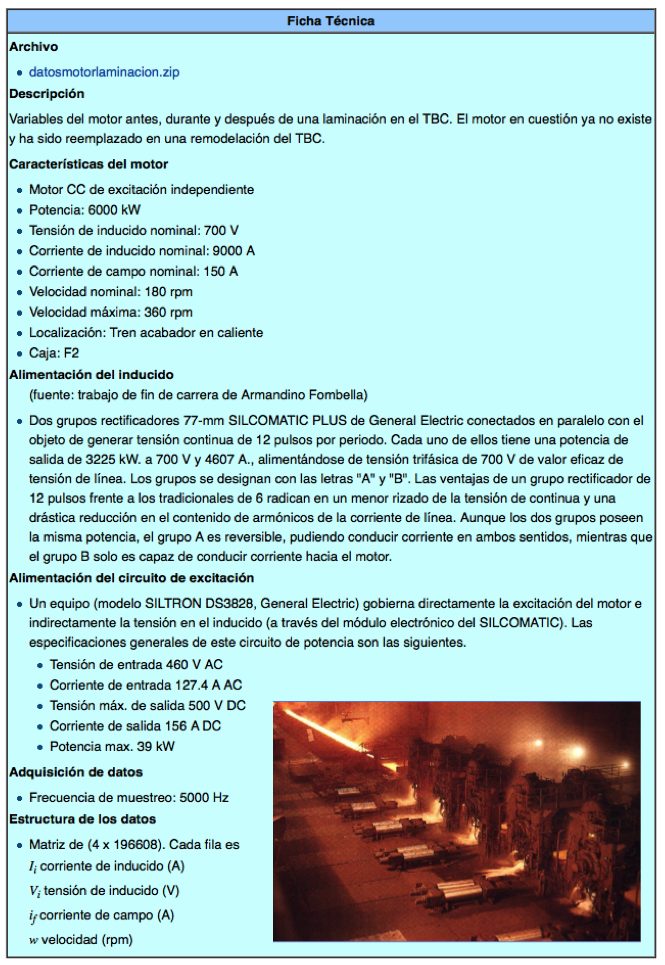



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
# cargamos los datos
datos = loadmat('../../datos/datosmotorlaminacion.mat')

In [3]:
# la matriz de datos está en el campo (key) 'p'
p = datos['p']

# frecuencia y periodo de muestreo
fm = 5000         # esto es dato, nos lo dicen
tm = 1/fm         # el periodo de muestreo es la inversa de la frecuencia de muestreo

# tamaño del vector de datos (numero de timesteps)
Q = p.shape[1]

# creamos el vector de tiempos con separación tm entre muestras consecutivas
t = np.arange(Q)*tm

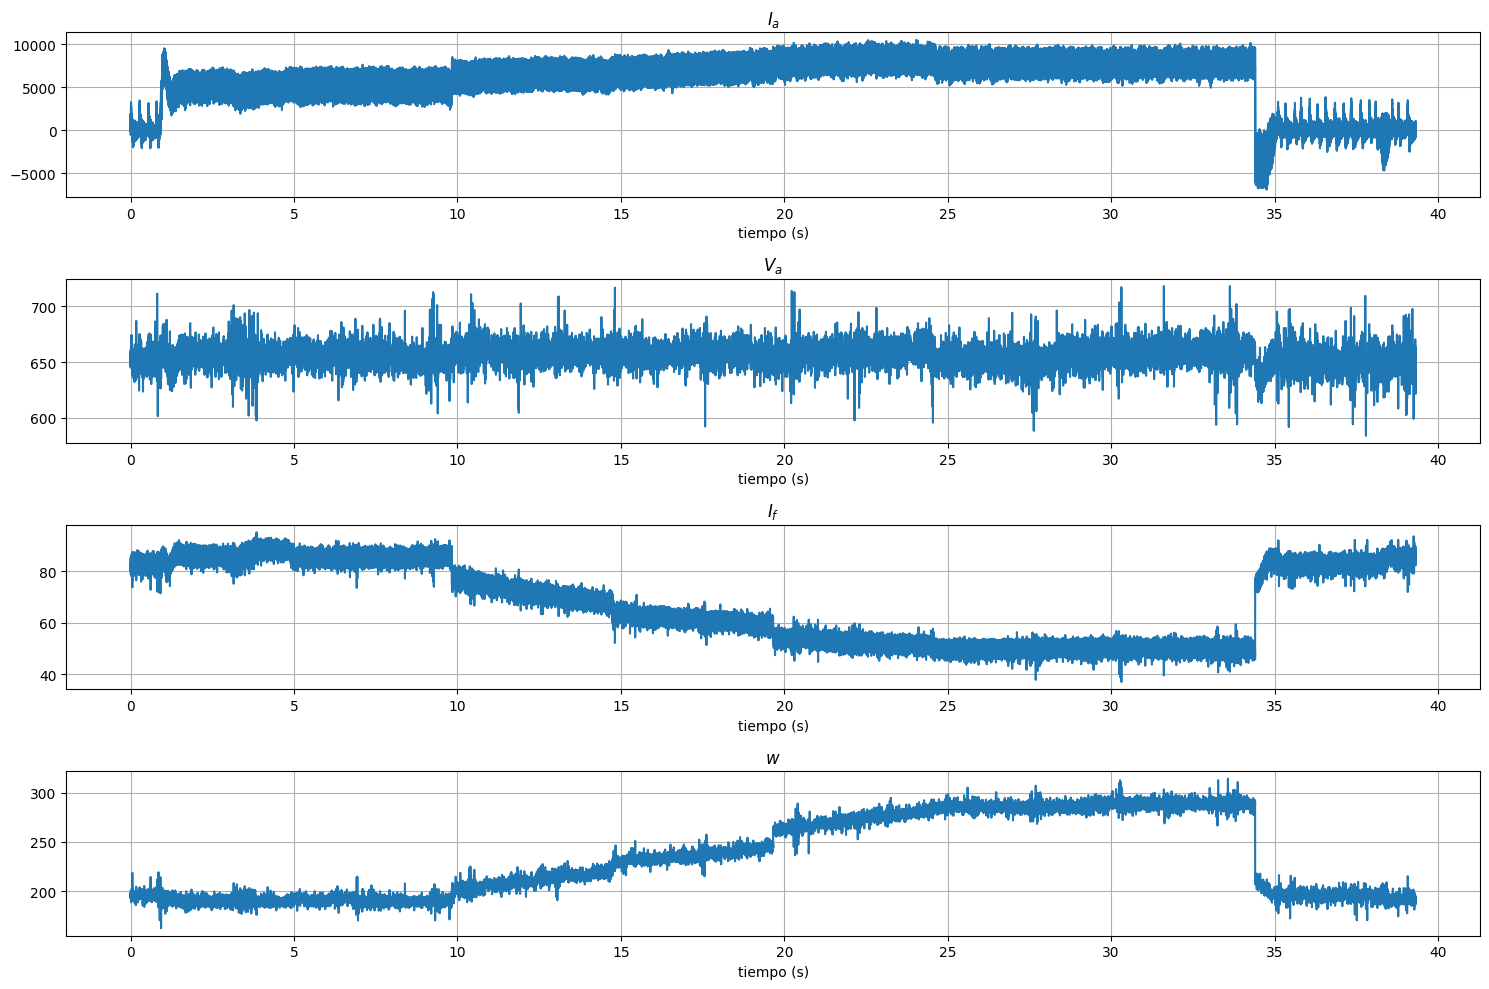

In [4]:
# etiquetas de los atributos o variables
labels = ['I_a','V_a','I_f','w']

# dibujamos la evolución temporal de las 4 variables
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.plot(t,p[i,:])
    plt.grid(True)
    plt.title(f'${labels[i]}$')
    plt.xlabel('tiempo (s)')
plt.tight_layout()
plt.show()

In [5]:
Q = p.shape[1]
N = 1000
delta = 100

# creamos una lista (contenedor) vacía
F = []

for k in range(0,Q-N,delta):
    idx = np.arange(k,k+N)

    # SENSOR 1: corriente de inducido 'Ia'
    v = p[0,idx]/9000                   # normalizamos a p.u. (la dividimos por su valor nominal)

    # calculamos algunas características
    media = v.mean()
    desvi = v.std()
    maxim = v.max()

    # característica de valor RMS en banda de frecuencia [280,320]
    Y  = abs(np.fft.fft(v))**2/N        # energías de los armónicos mediante la función fft()
    f = np.arange(0,fm,fm/N)            # frecuencias de cada armónico de la fft
    idxf = np.where((f>280)&(f<320))[0]  # índices de los elementos con las frecuencias de interés

    # calulamos la característica (valor RMS) sumando solo los armónicos en las frecuencias de interés
    arm_300 = np.sqrt(sum(2*Y[idxf])/float(N)) ;

    # SENSOR 2: tensión de inducido 'Va'
    v = p[1,idx]/700                    # normalizamos a p.u. (la dividimos por su valor nominal)                        
    std_Va = v.std()

    # SENSOR 4: velocidad de giro 'w'
    v = p[3,idx]/180                    # normalizamos a p.u. (la dividimos por su valor nominal)
    media_w = v.mean()

    # añadimos las características de la muestra actual
    F.append([media, desvi, maxim, arm_300, std_Va, media_w ])
    

X = np.array(F)

feature_labels = ['media Ia', 'std Ia', 'max Ia', 'Ia_300Hz', 'std Va', 'media w']

# Representación SPLOM (*Scatter PLOt Matrix*)

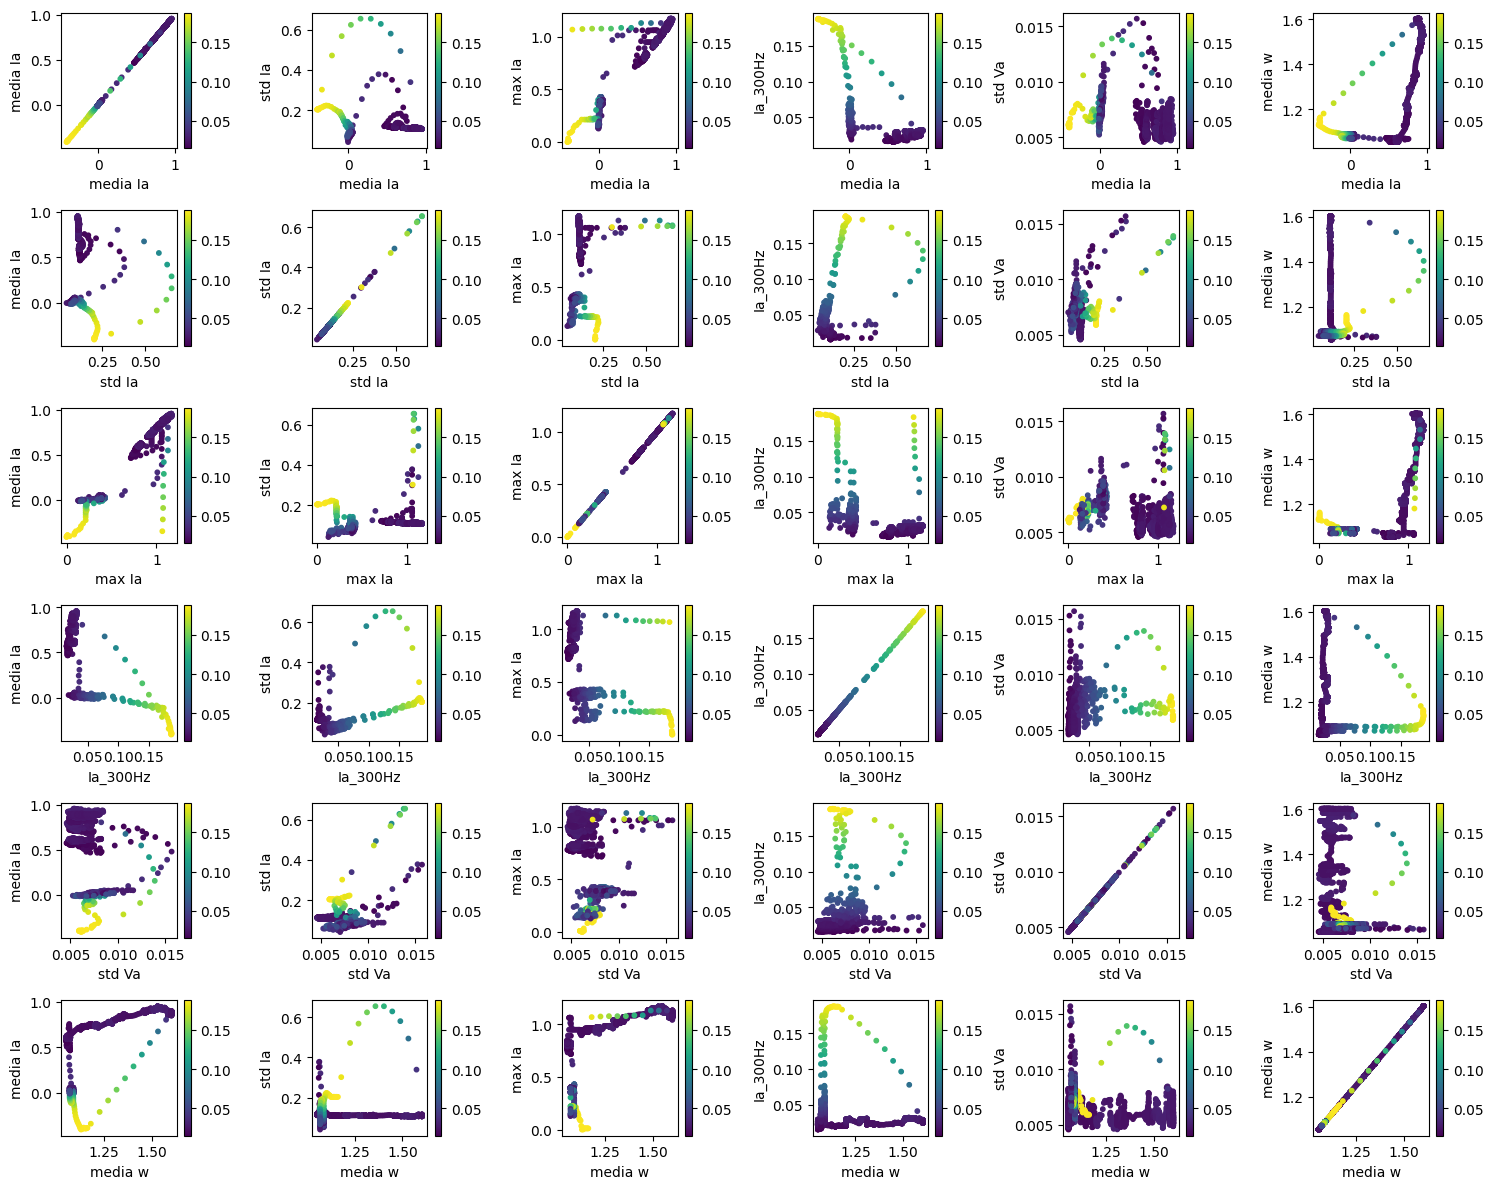

In [6]:

plt.figure(figsize=(15,12))
ii = 0
for i in range(6):
    for j in range(6):
        ii = ii + 1
        plt.subplot(6,6,ii)
        plt.scatter(X[:,i],X[:,j],s=10,c=X[:,3])
        plt.colorbar()
        plt.xlabel(feature_labels[i])
        plt.ylabel(feature_labels[j])

plt.tight_layout()

## Evolución temporal de las características

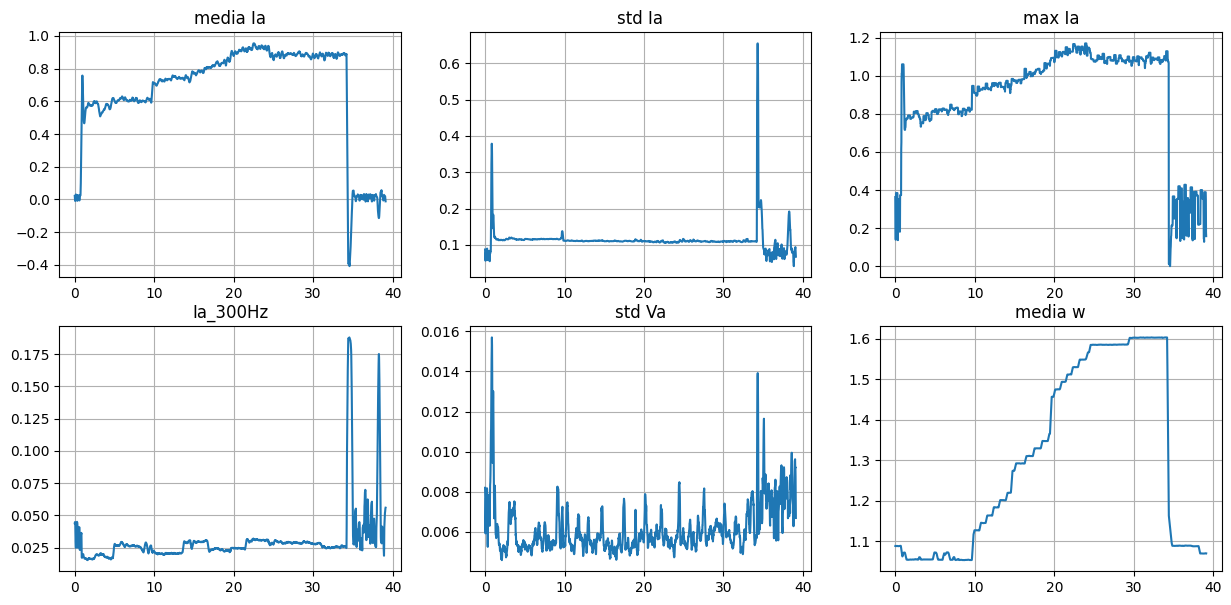

In [7]:
# timestamps de las características (su periodo de muestro es 100 veces más lento)
tf = np.arange(X.shape[0])*100*tm

plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(tf,X[:,i])
    plt.title(feature_labels[i])
    plt.grid(True)

# Reducción de la Dimensionalidad (PCA, t-SNE, UMAP)

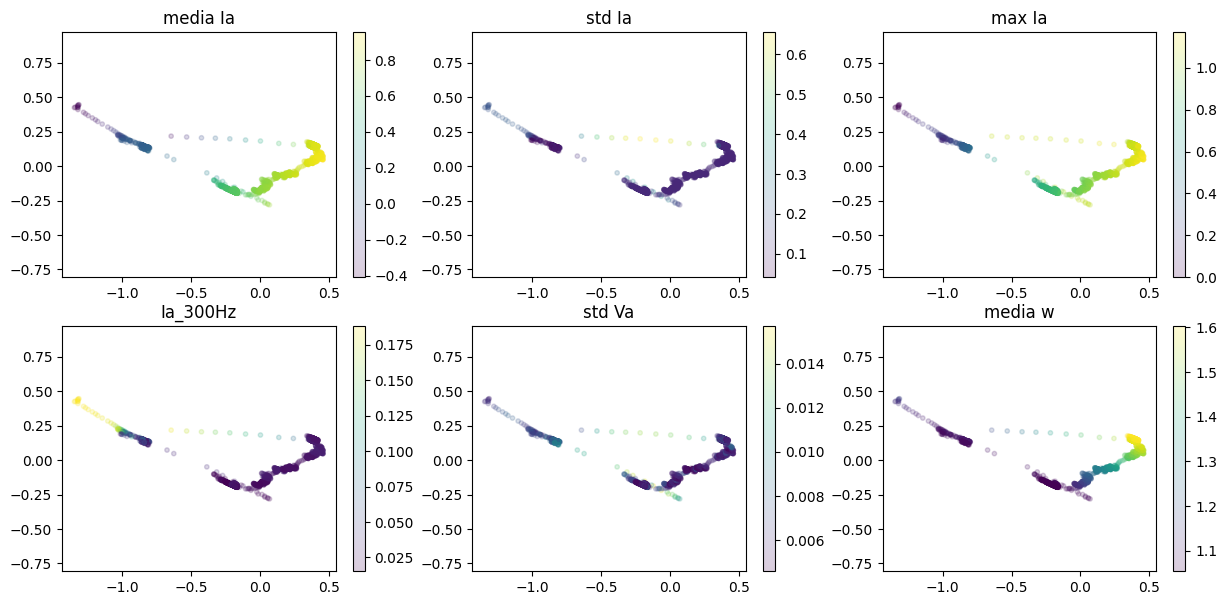

In [8]:
# PROYECCIÓN DE LAS CARACTERÍSTICAS A 2D PARA VISUALIZACIÓN

proyeccion='pca'

if proyeccion=='pca':
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    y = pca.fit_transform(X)

elif proyeccion=='tsne':
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2,perplexity=80)
    y = tsne.fit_transform(X)

elif proyeccion=='umap':
    from umap import UMAP
    umap = UMAP(n_components=2,min_dist=0.5,n_neighbors=50)
    y = umap.fit_transform(X)


plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.scatter(y[:,0],y[:,1],s=10,c=X[:,i],alpha=0.2)
    plt.colorbar()
    plt.title(feature_labels[i])
    plt.axis('equal')


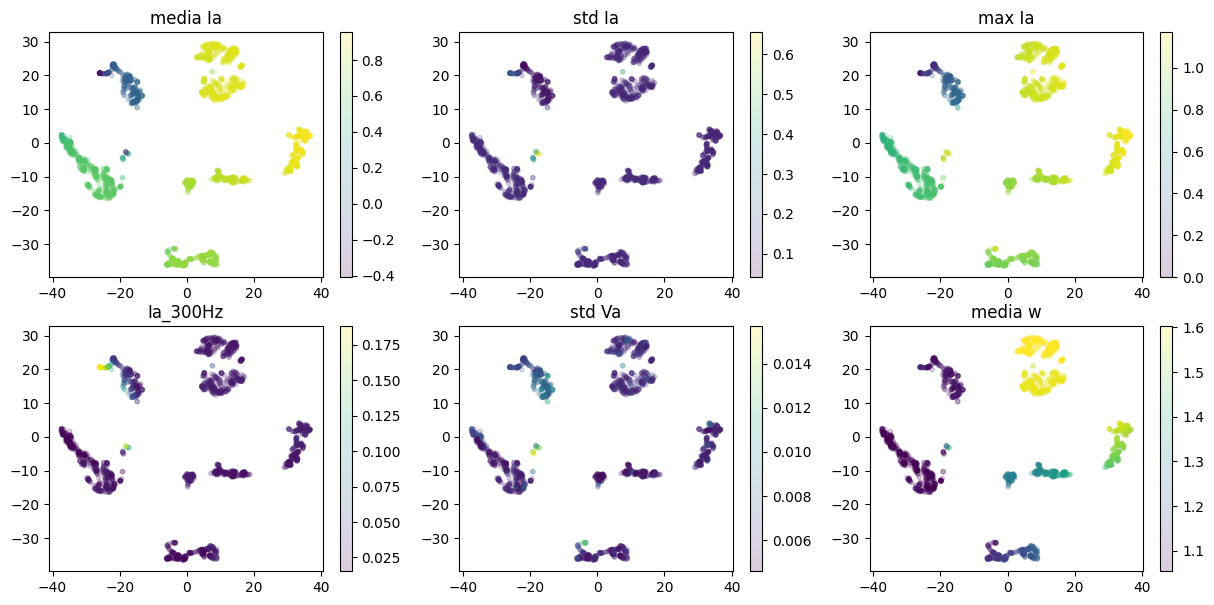

In [9]:
proyeccion='tsne'

if proyeccion=='pca':
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    y = pca.fit_transform(X)

elif proyeccion=='tsne':
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2,perplexity=80)
    y = tsne.fit_transform(X)

elif proyeccion=='umap':
    from umap import UMAP
    umap = UMAP(n_components=2,min_dist=0.5,n_neighbors=50)
    y = umap.fit_transform(X)


plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.scatter(y[:,0],y[:,1],s=10,c=X[:,i],alpha=0.2)
    plt.colorbar()
    plt.title(feature_labels[i])
    plt.axis('equal')


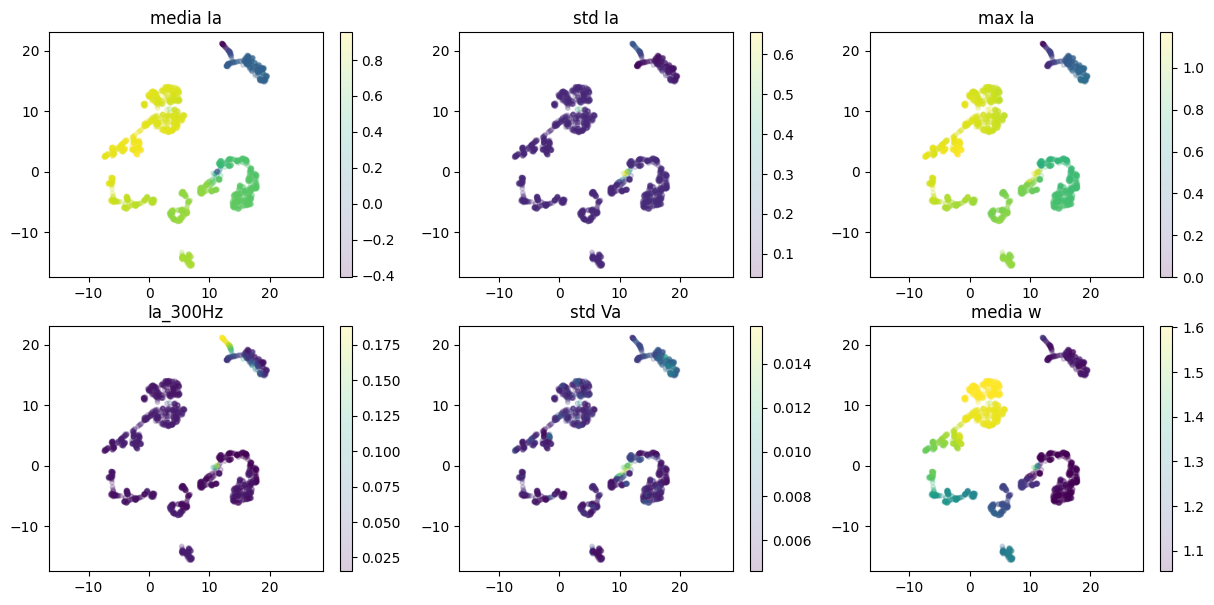

In [10]:
proyeccion='umap'

if proyeccion=='pca':
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    y = pca.fit_transform(X)

elif proyeccion=='tsne':
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2,perplexity=80)
    y = tsne.fit_transform(X)

elif proyeccion=='umap':
    from umap import UMAP
    umap = UMAP(n_components=2,min_dist=0.5,n_neighbors=50)
    y = umap.fit_transform(X)


plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.scatter(y[:,0],y[:,1],s=10,c=X[:,i],alpha=0.2)
    plt.colorbar()
    plt.title(feature_labels[i])
    plt.axis('equal')



# Vista coordinadas: representación temporal y espacio latente

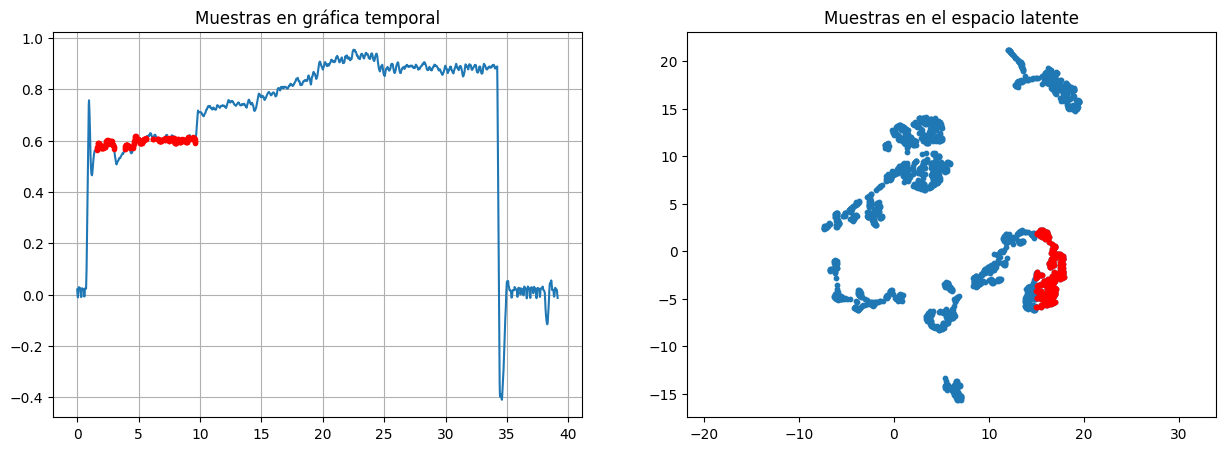

In [11]:
# SELECCIÓN DE ESTADOS EN UNA ZONA EN EL ESPACIO LATENTE
# indices de los puntos 2D que están en una región dada del espacio latente
idx = np.where((y[:,0]>15)&(y[:,1]<10))[0]

# VISUALIZACIÓN DE LOS ESTADOS SELECCIONADOS
tf = np.arange(X.shape[0])*100*tm
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(tf,X[:,0])
plt.plot(tf[idx],X[idx,0],'r.',linewidth=3)
plt.grid(True)
plt.title('Muestras en gráfica temporal')
plt.subplot(1,2,2)
plt.scatter(y[:,0],y[:,1],s=10)
plt.scatter(y[idx,0],y[idx,1],s=10,c='red')
plt.title('Muestras en el espacio latente')
plt.axis('equal');